In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
import time
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

#### Data Cleaning

In [ ]:
Read our data file: https://chronicdata.cdc.gov/Heart-Disease-Stroke-Prevention/National-Health-Interview-Survey-NHIS-National-Car/fwns-azgu
https://www.cdc.gov/nchs/nhis/2021nhis.htm
med_data = pd.read_csv('adult21.csv')


SyntaxError: ignored

In [ ]:
med_data

,URBRRL,RATCAT_A,IMPINCFLG_A,CVDVAC2YR_A,CVDVAC2MR_A,CVDVAC1YR_A,CVDVAC1MR_A,SHTCVD19AV_A,SHTCVD19NM_A,SHTCVD19_A,...,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,IMPNUM_A,WTFA_A,HHX,POVRATTC_A
0,4,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,5423.324,H056808,1.93
1,4,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,3832.196,H018779,4.45
2,4,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,3422.661,H049265,5.94
3,3,11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,12960.165,H007699,3.70
4,1,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,9284.618,H066034,1.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29477,4,14,1,2021.0,1.0,2021.0,6.0,NaN,3.0,1.0,...,NaN,NaN,1,1,12,10,1,3203.634,H012375,5.11
29478,4,10,0,2021.0,3.0,2021.0,4.0,NaN,2.0,1.0,...,NaN,NaN,1,1,12,10,1,1556.049,H052160,3.03
29479,4,8,0,2021.0,4.0,2021.0,11.0,NaN,3.0,1.0,...,NaN,NaN,1,1,12,10,1,6238.789,H051563,2.07
29480,4,8,0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,1,1,12,10,1,4769.800,H058432,2.05


In [ ]:
med_data['HLTHCOND_A']

0        2
1        2
2        2
3        1
4        2
        ..
29477    2
29478    1
29479    2
29480    2
29481    2
Name: HLTHCOND_A, Length: 29482, dtype: int64

In [ ]:
med_data.shape

(29482, 622)

In [ ]:
## Finding the percentages of NaN values per columns
percent_missing = med_data.isnull().sum() * 100 / len(med_data)
missing_value_df = pd.DataFrame({'column_name': med_data.columns,
                                 'percent_missing': percent_missing})

## sorting percent missing in ascending order
missing_value_df.sort_values('percent_missing', inplace=True)

In [ ]:
## Discretionarily isolating relevant or potentially relevant features related to our dependent variable
filtered_col_df = med_data[["HLTHCOND_A","WTFA_A", "URBRRL", "AGEP_A", "SEX_A", "EDUCP_A", "PHSTAT_A", "LSATIS11R_A", "LSATIS4R_A", "HYP12M_A", "HYPMED_A", "CHL12M_A", "CHLMED_A", "CHDEV_A", "ANGEV_A", "MIEV_A", "STREV_A", "ASPONOWN_A", "ASEV_A", "ASTILL_A", "CANEV_A", "BLADDCAN_A", "BLOODCAN_A", "BONECAN_A", "BRAINCAN_A", "BREASCAN_A", "CERVICAN_A", "COLONCAN_A", "ESOPHCAN_A", "GALLBCAN_A", "LARYNCAN_A", "LEUKECAN_A", "LIVERCAN_A", "LUNGCAN_A", "LYMPHCAN_A", "MELANCAN_A", "MOUTHCAN_A", "OVARYCAN_A", "PANCRCAN_A", "PROSTCAN_A", "RECTUCAN_A", "SKNMCAN_A", "SKNNMCAN_A", "SKNDKCAN_A", "STOMACAN_A", "THROACAN_A", "THYROCAN_A", "UTERUCAN_A", "HDNCKCAN_A", "COLRCCAN_A", "OTHERCANP_A", "DIBEV_A", "DIFYRSTC1_A", "DIBTYPE_A", "COPDEV_A", "ARTHEV_A", "DEMENEV_A", "ANXEV_A", "DEPEV_A", "KIDWEAKEV_A", "HEPEV_A", "LIVEREV_A", "CFSEV_A", "COLDFLU12M_A", "EPIEV_A", "DXRESP_A", "HEIGHTTC_A", "WEIGHTLBTC_A", "COMDIFF_A", "NOTCOV_A", "SINCOVRX_A", "MCPART_A", "MCCHOICE_A",  "POLHLD1_A", "MAPREM_A", "PLN1PAY1_A", "HICOSTR1_A", "PRRXCOV1_A", "POLHLD2_A", "PLNEXCHG2_A", "PLN2PAY1_A", "HICOSTR2_A", "PRRXCOV2_A", "CHPREM_A", "OPPREM_A", "HILAST_A", "HILASTMY_A", "HISTOPCOST_A", "RSNHICOST_A", "HISTOPELIG_A", "RSNHIMISS_A", "HINOTYR_A", "HICOV_A", "PAYBLL12M_A", "PAYNOBLLNW_A", "PAYWORRY_A", "CVDDIAG_A", "CVDRSLT_A", "CVDSEV_A", "LASTDR_A", "URGNT12MTC_A", "EMERG12MTC_A", "HOSPONGT_A", "DLYCARE_A", "DNGCARE_A", "CANCOVTREA_A", "CANCOVCHG_A", "JOBMISS_A", "CURJOBSD1_A", "INCWRKO_A", "FSNAP12M_A", "FDSBALANCE_A", "FDSNOTEAT_A", "FDSLESS_A", "CIGNOW_A", "ECIGEV_A", "ECIGNOW_A", "SUPPORT_A", "BPLAST_A", "CHOLLAST_A", "DIBLAST1_A", "PSATEST_A", "LIVEBIRTH_A", "LIVEHEP_A", "ANXFREQ_A", "DEPMED_A", "PAIULMB3M_A" , "SAD_A", "MHTHND_A", "DEPLEVEL_A" , "FAMCARECVD_A", "COLOGUARD1_A" , "PSAREASON_A" , "MAMWHEN_A" , "HYSTEV1_A"]]


In [ ]:
## Finding the percentages of NaN values per columns on filtered data
percent_missing_filtered = filtered_col_df.isnull().sum() * 100 / len(filtered_col_df)
percent_missing_filtered.sort_values(inplace=True)
percent_missing_filtered_df = pd.DataFrame(percent_missing_filtered)
percent_missing_filtered_df

,0
HLTHCOND_A,0.000000
HICOV_A,0.000000
SINCOVRX_A,0.000000
NOTCOV_A,0.000000
COMDIFF_A,0.000000
...,...
HICOSTR2_A,98.656808
OPPREM_A,99.430161
FAMCARECVD_A,99.457296
PLNEXCHG2_A,99.681161


In [ ]:
## Eliminate features which contain more than 53% nan values due to large jump from 53% to 63% in our relevant features
percent_missing_filtered_df[50:100]

,0
LSATIS11R_A,0.000000
PHSTAT_A,0.000000
MIEV_A,0.000000
LIVEHEP_A,1.913032
HINOTYR_A,7.530018
DIBLAST1_A,10.630215
COLOGUARD1_A,29.448477
POLHLD1_A,36.374737
PRRXCOV1_A,36.374737
PLN1PAY1_A,36.374737


In [ ]:
# renamed columns so it's easier to work with
percent_missing_filtered_df= percent_missing_filtered_df.reset_index()
percent_missing_filtered_df.rename(columns={'index': 'colname', 0: 'percent_missing'}, inplace=True)
percent_missing_filtered_df

,colname,percent_missing
0,HLTHCOND_A,0.000000
1,HICOV_A,0.000000
2,SINCOVRX_A,0.000000
3,NOTCOV_A,0.000000
4,COMDIFF_A,0.000000
...,...,...
130,HICOSTR2_A,98.656808
131,OPPREM_A,99.430161
132,FAMCARECVD_A,99.457296
133,PLNEXCHG2_A,99.681161


In [ ]:
med_data_keep_col = percent_missing_filtered_df[percent_missing_filtered_df.percent_missing < 53]
med_data_keep_col['colname'].array

<PandasArray>
[  'HLTHCOND_A',      'HICOV_A',   'SINCOVRX_A',     'NOTCOV_A',
    'COMDIFF_A',   'HEIGHTTC_A',      'EPIEV_A', 'COLDFLU12M_A',
      'CFSEV_A',    'LIVEREV_A',      'HEPEV_A',  'KIDWEAKEV_A',
      'DEPEV_A',      'ANXEV_A',    'DEMENEV_A',     'ARTHEV_A',
  'PAYBLL12M_A',   'PAYWORRY_A',    'CVDDIAG_A',     'LASTDR_A',
     'MHTHND_A',        'SAD_A',     'DEPMED_A',    'ANXFREQ_A',
   'CHOLLAST_A',     'BPLAST_A',    'SUPPORT_A',     'COPDEV_A',
     'ECIGEV_A',   'FSNAP12M_A',    'INCWRKO_A',    'DNGCARE_A',
    'DLYCARE_A',   'HOSPONGT_A', 'EMERG12MTC_A', 'URGNT12MTC_A',
 'FDSBALANCE_A',      'DIBEV_A', 'WEIGHTLBTC_A',       'ASEV_A',
       'URBRRL',       'AGEP_A',        'SEX_A',      'CANEV_A',
       'WTFA_A',      'STREV_A',      'EDUCP_A',      'ANGEV_A',
      'CHDEV_A',   'LSATIS4R_A',  'LSATIS11R_A',     'PHSTAT_A',
       'MIEV_A',    'LIVEHEP_A',    'HINOTYR_A',   'DIBLAST1_A',
 'COLOGUARD1_A',    'POLHLD1_A',   'PRRXCOV1_A',   'PLN1PAY1_A',
  'PAIULMB3

In [ ]:
med_data_col_filter = med_data[[  'HLTHCOND_A',      'HICOV_A',   'SINCOVRX_A',     'NOTCOV_A',
    'COMDIFF_A',   'HEIGHTTC_A',      'EPIEV_A', 'COLDFLU12M_A',
      'CFSEV_A',    'LIVEREV_A',      'HEPEV_A',  'KIDWEAKEV_A',
      'DEPEV_A',      'ANXEV_A',    'DEMENEV_A',     'ARTHEV_A',
  'PAYBLL12M_A',   'PAYWORRY_A',    'CVDDIAG_A',     'LASTDR_A',
     'MHTHND_A',        'SAD_A',     'DEPMED_A',    'ANXFREQ_A',
   'CHOLLAST_A',     'BPLAST_A',    'SUPPORT_A',     'COPDEV_A',
     'ECIGEV_A',   'FSNAP12M_A',    'INCWRKO_A',    'DNGCARE_A',
    'DLYCARE_A',   'HOSPONGT_A', 'EMERG12MTC_A', 'URGNT12MTC_A',
 'FDSBALANCE_A',      'DIBEV_A', 'WEIGHTLBTC_A',       'ASEV_A',
       'URBRRL',       'AGEP_A',        'SEX_A',      'CANEV_A',
       'WTFA_A',      'STREV_A',      'EDUCP_A',      'ANGEV_A',
      'CHDEV_A',   'LSATIS4R_A',  'LSATIS11R_A',     'PHSTAT_A',
       'MIEV_A',    'LIVEHEP_A',    'HINOTYR_A',   'DIBLAST1_A',
 'COLOGUARD1_A',    'POLHLD1_A',   'PRRXCOV1_A',   'PLN1PAY1_A',
  'PAIULMB3M_A',    'CVDRSLT_A',  'CURJOBSD1_A',    'JOBMISS_A',
    'HYSTEV1_A',   'HICOSTR1_A',     'DXRESP_A',   'DEPLEVEL_A']]

In [ ]:
## Check to ensure all values are numerical and do not require one-hot encoding
num_missing_filtered = med_data_col_filter.isnull().sum() * 100 / len(med_data_col_filter)
num_missing_filtered

HLTHCOND_A     0.000000
HICOV_A        0.000000
SINCOVRX_A     0.000000
NOTCOV_A       0.000000
COMDIFF_A      0.000000
                ...    
JOBMISS_A     45.285259
HYSTEV1_A     45.383624
HICOSTR1_A    48.192117
DXRESP_A      50.420596
DEPLEVEL_A    52.499830
Length: 68, dtype: float64

In [ ]:
## FOr the remaining features with nan values, impute the values to "don't know response", or the number 9
med_data_col_filter_fillna = med_data_col_filter.fillna(9)

In [ ]:
med_data_col_filter_fillna

,HLTHCOND_A,HICOV_A,SINCOVRX_A,NOTCOV_A,COMDIFF_A,HEIGHTTC_A,EPIEV_A,COLDFLU12M_A,CFSEV_A,LIVEREV_A,...,PRRXCOV1_A,PLN1PAY1_A,PAIULMB3M_A,CVDRSLT_A,CURJOBSD1_A,JOBMISS_A,HYSTEV1_A,HICOSTR1_A,DXRESP_A,DEPLEVEL_A
0,2,1,2,2,1,69,2,2,2,2,...,1.0,1.0,2.0,2.0,1.0,0.0,9.0,1440.0,1.0,9.0
1,2,1,1,2,1,75,2,2,2,2,...,1.0,1.0,1.0,1.0,1.0,18.0,9.0,3600.0,9.0,9.0
2,2,1,1,2,1,67,2,2,2,2,...,1.0,1.0,2.0,1.0,1.0,21.0,9.0,3000.0,1.0,1.0
3,1,1,2,2,1,63,2,2,2,2,...,9.0,9.0,3.0,2.0,9.0,9.0,2.0,9.0,9.0,3.0
4,2,1,1,2,1,72,2,2,2,2,...,1.0,1.0,9.0,2.0,9.0,9.0,9.0,99999.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29477,2,1,2,2,1,61,2,2,2,2,...,7.0,1.0,1.0,9.0,9.0,9.0,2.0,99997.0,1.0,2.0
29478,1,1,2,2,1,68,2,2,2,2,...,1.0,1.0,3.0,1.0,1.0,0.0,2.0,360.0,9.0,3.0
29479,2,1,2,2,3,60,2,2,2,2,...,9.0,9.0,3.0,2.0,9.0,9.0,2.0,9.0,1.0,1.0
29480,2,1,2,2,2,71,1,2,2,2,...,9.0,9.0,2.0,9.0,9.0,9.0,9.0,9.0,1.0,1.0


In [ ]:
## For responses "refused", "not ascertained", "don't know" (7, 8 , 9) for y label, change to baseline response of no (0)
med_data_col_filter_fillna["HLTHCOND_B"] = [1 if x == 1 else 0 for x in med_data_col_filter_fillna["HLTHCOND_A"]]

In [ ]:
med_data_col_filter_fillna["HLTHCOND_B"].value_counts()

0    28057
1     1425
Name: HLTHCOND_B, dtype: int64

In [ ]:
med_data_col_filter_fillna = med_data_col_filter_fillna.drop(["HLTHCOND_A"], axis=1)

In [ ]:
## Isolate our dependent variable, weakened immune system, from cleaned data set
## Split the cleaned data set into a training set of 70% size and a test set of 30% size
from sklearn.model_selection import train_test_split

y = med_data_col_filter_fillna['HLTHCOND_B']
X = med_data_col_filter_fillna.drop(['HLTHCOND_B'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)
X_train.shape, X_test.shape

((20637, 67), (8845, 67))

In [ ]:
med_data_col_filter_fillna.head()

,HICOV_A,SINCOVRX_A,NOTCOV_A,COMDIFF_A,HEIGHTTC_A,EPIEV_A,COLDFLU12M_A,CFSEV_A,LIVEREV_A,HEPEV_A,...,PLN1PAY1_A,PAIULMB3M_A,CVDRSLT_A,CURJOBSD1_A,JOBMISS_A,HYSTEV1_A,HICOSTR1_A,DXRESP_A,DEPLEVEL_A,HLTHCOND_B
0,1,2,2,1,69,2,2,2,2,2,...,1.0,2.0,2.0,1.0,0.0,9.0,1440.0,1.0,9.0,0
1,1,1,2,1,75,2,2,2,2,2,...,1.0,1.0,1.0,1.0,18.0,9.0,3600.0,9.0,9.0,0
2,1,1,2,1,67,2,2,2,2,2,...,1.0,2.0,1.0,1.0,21.0,9.0,3000.0,1.0,1.0,0
3,1,2,2,1,63,2,2,2,2,2,...,9.0,3.0,2.0,9.0,9.0,2.0,9.0,9.0,3.0,1
4,1,1,2,1,72,2,2,2,2,2,...,1.0,9.0,2.0,9.0,9.0,9.0,99999.0,9.0,9.0,0


####Our Feature Variables for Predicting: Immunosuppression column 'HLTHCOND_A' (Weakened immune system due to health condition)

Charlie (1-5): WTFA_A, URBRRL, AGEP_A, SEX_A, EDUCP_A, PHSTAT_A, LSATIS11R_A, LSATIS4R_A, HYP12M_A, HYPMED_A, CHL12M_A, CHLMED_A, CHDEV_A, ANGEV_A, MIEV_A, STREV_A, ASPONOWN_A, ASEV_A, ASTILL_A, CANEV_A, BLADDCAN_A, BLOODCAN_A, BONECAN_A, BRAINCAN_A, BREASCAN_A, CERVICAN_A, COLONCAN_A, ESOPHCAN_A, GALLBCAN_A, LARYNCAN_A, LEUKECAN_A, LIVERCAN_A, LUNGCAN_A, LYMPHCAN_A, MELANCAN_A, MOUTHCAN_A, OVARYCAN_A, PANCRCAN_A, PROSTCAN_A, RECTUCAN_A, SKNMCAN_A

Ryan(6-10): SKNNMCAN_A, SKNDKCAN_A, STOMACAN_A, THROACAN_A, THYROCAN_A, UTERUCAN_A, HDNCKCAN_A, COLRCCAN_A, OTHERCANP_A, DIBEV_A, DIFYRSTC1_A, DIBTYPE_A, COPDEV_A, ARTHEV_A, DEMENEV_A, ANXEV_A, DEPEV_A, KIDWEAKEV_A, HEPEV_A, LIVEREV_A, CFSEV_A, COLDFLU12M_A, EPIEV_A, DXRESP_A, HEIGHTTC_A, WEIGHTLBTC_A, COMDIFF_A

Isaac: BPLAST_A, CHOLLAST_A, DIBLAST1_A, PSATEST_A, LIVEBIRTH_A, LIVEHEP_A, ANXFREQ_A, DEPMED_A, PAIULMB3M_A , SAD_A, MHTHND_A, DEPLEVEL_A , FAMCARECVD_A, COLOGUARD1_A , PSAREASON_A , MAMWHEN_A , HYSTEV1_A

Tanmay (11-15): NOTCOV_A, SINCOVRX_A, MCPART_A, MCCHOICE_A,  POLHLD1_A, MAPREM_A, PLN1PAY1_A, HICOSTR1_A, PRRXCOV1_A, POLHLD2_A, PLNEXCHG2_A, PLN2PAY1_A, HICOSTR2_A, PRRXCOV2_A, CHPREM_A, OPPREM_A, HILAST_A, HILASTMY_A, HISTOPCOST_A, RSNHICOST_A, HISTOPELIG_A, RSNHIMISS_A, HINOTYR_A, HICOV_A, PAYBLL12M_A, PAYNOBLLNW_A, PAYWORRY_A, CVDDIAG_A, CVDRSLT_A, CVDSEV_A, LASTDR_A, URGNT12MTC_A, EMERG12MTC_A, HOSPONGT_A, DLYCARE_A, DNGCARE_A, CANCOVTREA_A, CANCOVCHG_A

Annie (21-27): JOBMISS_A, CURJOBSD1_A, INCWRKO_A, FSNAP12M_A, FDSBALANCE_A, FDSNOTEAT_A, FDSLESS_A, CIGNOW_A, ECIGEV_A, ECIGNOW_A, SUPPORT_A

*   List item
*   List item

FDSNOTEAT_A, FDSLESS_A

#### Functions

In [ ]:
def pre(y_test, pred):
  cm = confusion_matrix(y_test, pred)
  tn, fp, fn, tp = cm.ravel()
  pre = tp / (tp + fp)
  return pre

def fpr(y_test, pred):
  cm = confusion_matrix(y_test, pred)
  tn, fp, fn, tp = cm.ravel()
  fpr = fp / (fp + tn)
  return fpr

def acc(y_test, pred):
  acc1 = np.sum(np.abs(pred - y_test)) / len(pred)
  acc2 = 1 - acc1
  return acc2

def tpr(y_test, pred):
  cm = confusion_matrix(y_test, pred)
  tn, fp, fn, tp = cm.ravel()
  tpr = tp / (tp + fn)
  return tpr

#### Baseline

In [ ]:
imm_s = np.sum(med_data_col_filter_fillna['HLTHCOND_B'] == 1)  # not default
n_imm_s = np.sum(med_data_col_filter_fillna['HLTHCOND_B'] == 0)
imm_s, n_imm_s

(1425, 28057)

In [ ]:
  # default
baseline_acc = n_imm_s / (n_imm_s + imm_s)
recall_bl = 0
pre_bl = 0
fpr_bl = 0
print(f'Baseline Test Accuracy: {baseline_acc:.4f}')

Baseline Test Accuracy: 0.9517


#### Logistic Regression

In [ ]:
logreg_2 = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.160355
         Iterations 9


In [ ]:
y_pred_logreg_2 = logreg_2.predict(X_test)
y_pred_logreg_2_1 = pd.Series([1 if x > 0.5 else 0 for x in y_pred_logreg_2], index = y_pred_logreg_2.index)

In [ ]:
acc_logreg_2 = accuracy_score(y_test, y_pred_logreg_2_1)
recall_logreg_2 = tpr(y_test, y_pred_logreg_2_1)
pre_logreg_2 = pre(y_test, y_pred_logreg_2_1)
fpr_logreg_2 = fpr(y_test, y_pred_logreg_2_1)

print(f'Logistic Regression Test Accuracy: {acc_logreg_2:.4f}')
print(f'Logistic Regression TPR Accuracy: {recall_logreg_2:.4f}')

Logistic Regression Test Accuracy: 0.9525
Logistic Regression TPR Accuracy: 0.0223


#### LDA

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_pred_lda = lda.predict(X_test)

cm_lda = confusion_matrix(y_test, y_pred_lda)
acc_lda = accuracy_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)
pre_lda = pre(y_test, y_pred_lda)
fpr_lda = fpr(y_test, y_pred_lda)
print(f'LDA Test Accuracy: {acc_lda:.4f}')
print(f'LDA Recall Score: {recall_lda:.4f}')

LDA Test Accuracy: 0.9461
LDA Recall Score: 0.0866


#### Decision Tree Classifier

In [ ]:
dtc_1 = DecisionTreeClassifier(random_state = 88)
dtc_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=88)

In [ ]:
y_pred_dtc_1 = dtc_1.predict(X_test)

In [ ]:
acc_dtc_1 = accuracy_score(y_test, y_pred_dtc_1)
recall_dtc_1 = recall_score(y_test, y_pred_dtc_1)
pre_dtc_1 = pre(y_test, y_pred_dtc_1)
fpr_dtc_1 = fpr(y_test, y_pred_dtc_1)
print(f'DTC1 Test Accuracy: {acc_dtc_1:.4f}')
print(f'DTC1 Recall Score: {recall_dtc_1:.4f}')

DTC1 Test Accuracy: 0.9149
DTC1 Recall Score: 0.1807


#### Decision Tree Classifier with CV

In [ ]:
grid_values_dtc = {'ccp_alpha': np.linspace(0, 0.1, 201),
               'random_state': [88]}


dtc_2 = DecisionTreeClassifier()
dtc_cv_2 = GridSearchCV(dtc_2, param_grid = grid_values_dtc, scoring = 'accuracy', cv=2, verbose=1) # default scoring metric to optimize is accuracy, used as default if none given.
dtc_cv_2.fit(X_train, y_train)

Fitting 2 folds for each of 201 candidates, totalling 402 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.020...
       0.076 , 0.0765, 0.077 , 0.0775, 0.078 , 0.0785, 0.079 , 0.0795,
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'random_state': [88]},
             scoring='accuracy', verb

In [ ]:
y_pred_dtc_cv = dtc_cv_2.best_estimator_.predict(X_test)

acc_dtc_2 = accuracy_score(y_test, y_pred_dtc_cv)
recall_dtc_2 = recall_score(y_test, y_pred_dtc_cv)
pre_dtc_2 = pre(y_test, y_pred_dtc_cv)
fpr_dtc_2 = fpr(y_test, y_pred_dtc_cv)
print(f'DTC1 Test Accuracy: {acc_dtc_2:.4f}')

DTC1 Test Accuracy: 0.9543


<ipython-input-23-902c90f8d8c9>:4: RuntimeWarning: invalid value encountered in long_scalars
  pre = tp / (tp + fp)


#### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state = 88)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm_rf.ravel()

acc_rf = (tn + tp) / (tn + fp + fn + tp) # TODO: calculate random forest accuracy
recall_rf = recall_score(y_test, y_pred_rf)
pre_rf = pre(y_test, y_pred_rf)
fpr_rf = fpr(y_test, y_pred_rf)
print(f'Random Forest Test Accuracy: {acc_rf:.4f}')
print(f'Random Forest Recall Score: {recall_rf:.4f}')

Random Forest Test Accuracy: 0.9547
Random Forest Recall Score: 0.0074


#### Random Forest with CV

In [ ]:
#grid_values_rf = {'max_features': np.linspace(1,2,2, dtype='int32'),
#               'random_state': [88]}
rf_cv = RandomForestClassifier()
p = int(len(X_train.columns))
grid_values_rf = {'max_features': np.arange(1, p+1, 1),
                  'random_state': [88]}
#cv_2_rf = KFold(n_splits=2,random_state=88,shuffle=True)
rf_cv_2 = GridSearchCV(rf_cv, param_grid=grid_values_rf, cv=5, scoring='accuracy',verbose=1)

rf_cv_2.fit(X_train, y_train)

Fitting 5 folds for each of 67 candidates, totalling 335 fits


KeyboardInterrupt: ignored

In [ ]:
#max_features_values = rf_cv_2.best_params_['max_features']
max_features_values = 15
rf_cv_2 = RandomForestClassifier(max_features = 15, random_state = 88)
rf_cv_2.fit(X_train, y_train)
#y_pred_rf_cv = rf_cv_2.best_estimator_.predict(X_test)
y_pred_rf_cv = rf_cv_2.predict(X_test)

acc_rf_cv = accuracy_score(y_test, y_pred_rf_cv)
recall_rf_cv = recall_score(y_test, y_pred_rf_cv)
pre_rf_cv = pre(y_test, y_pred_rf_cv)
fpr_rf_cv = fpr(y_test, y_pred_rf_cv)
# TODO: Calculate RF accuracy
print(f'CV Random Forest Max Features Optimal: {max_features_values:.4f}')
print(f'CV Random Forest Test Accuracy: {acc_rf_cv:.4f}')

CV Random Forest Max Features Optimal: 15.0000
CV Random Forest Test Accuracy: 0.9547


#### Gradient Boosting

In [ ]:
gbr = GradientBoostingClassifier(n_estimators=3300, random_state=88, verbose=1)
gbr.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.3793            9.87m
         2           0.3702            9.16m
         3           0.3628            9.08m
         4           0.3565            8.50m
         5           0.3518            8.77m
         6           0.3481            9.53m
         7           0.3448           10.17m
         8           0.3419            9.83m
         9           0.3391            9.33m
        10           0.3365            8.94m
        20           0.3199            9.40m
        30           0.3106            7.46m
        40           0.3041            6.41m
        50           0.2993            5.77m
        60           0.2956            5.34m
        70           0.2924            5.04m
        80           0.2893            4.80m
        90           0.2863            4.61m
       100           0.2836            4.47m
       200           0.2662            3.73m
       300           0.2500            3.40m
       40

GradientBoostingClassifier(n_estimators=3300, random_state=88, verbose=1)

In [ ]:
gbr_pred = gbr.predict(X_test)
acc_gbr = accuracy_score(y_test, gbr_pred)
recall_gbr = recall_score(y_test, gbr_pred)
pre_gbr = pre(y_test, gbr_pred)
fpr_gbr = fpr(y_test, gbr_pred)
# Calculate boosting accuracy
print(f'GBC Test Accuracy: {acc_gbr:.4f}')
print(f'GBC Recall Accuracy: {recall_gbr:.4f}')

GBC Test Accuracy: 0.9467
GBC Recall Accuracy: 0.1064


#### Vanilla Bagging

In [ ]:
v_bag = RandomForestClassifier(random_state = 88,max_features = 16)
v_bag.fit(X_train, y_train)
v_bag_pred = v_bag.predict(X_test)


In [ ]:
acc_v_bag = accuracy_score(y_test, v_bag_pred)
recall_v_bag = recall_score(y_test, v_bag_pred)
pre_vbag = pre(y_test, v_bag_pred)
fpr_vbag = fpr(y_test, v_bag_pred)
print(f'Vanilla Bagging Test Accuracy: {acc_v_bag:.4f}')
print(f'Vanilla Bagging Recall Accuracy: {recall_v_bag:.4f}')

Vanilla Bagging Test Accuracy: 0.9542
Vanilla Bagging Recall Accuracy: 0.0000


#### Comparison Table

In [ ]:
#Create Comparison Table
#These lines are provided for you to help construct a comparison table.
#It is not requred to follow this format. + You need to find ACC, TPR, FPR, PRE for each model that you choose.
comparison_data = {'Baseline':[baseline_acc,recall_bl,fpr_bl, pre_bl],
                   'Logistic Regression':[acc_logreg_2,recall_logreg_2,fpr_logreg_2, pre_logreg_2],
                   'LDA':[acc_lda,recall_lda, fpr_lda, pre_lda],
                  'Decision Tree Classifier':[acc_dtc_1,recall_dtc_1, fpr_dtc_1,pre_dtc_1],
                   'Decision Tree Classifier with CV':[acc_dtc_2,recall_dtc_2, fpr_dtc_2,pre_dtc_2],
                   'Random Forest':[acc_rf,recall_rf, fpr_rf,pre_rf],
                   'Random Forest with CV':[acc_rf_cv,recall_rf_cv, fpr_rf_cv,pre_rf_cv],
                   'Gradient Boosting':[acc_gbr,recall_gbr, fpr_gbr,pre_gbr],
                   'Vanilla Bagging':[acc_v_bag,recall_v_bag, fpr_vbag,pre_vbag]}

comparison_table = pd.DataFrame(data=comparison_data, index=['Accuracy', 'TPR', 'FPR','PRE']).transpose()
comparison_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])
comparison_table

,Accuracy,TPR,FPR,PRE
Baseline,0.951665,0.000000,0.000000,0.000000
Logistic Regression,0.952516,0.022277,0.002962,0.264706
LDA,0.946071,0.086634,0.012795,0.244755
Decision Tree Classifier,0.914867,0.180693,0.049994,0.147475
Decision Tree Classifier with CV,0.954324,0.000000,0.000000,NaN
Random Forest,0.954664,0.007426,0.000000,1.000000
Random Forest with CV,0.954664,0.007426,0.000000,1.000000
Gradient Boosting,0.946184,0.103960,0.013506,0.269231
Vanilla Bagging,0.954211,0.000000,0.000118,0.000000


#### Bootstrap Validation

In [ ]:
def bootstrap_validation(test_data, test_label, model, metrics_list, sample=500, random_state=66):
    tic = time.time()
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted,bs_label)
    output_df = pd.DataFrame(output_array)
    return output_df

Bootstrap validation for performance metrics of DTC

In [ ]:
bs_output = bootstrap_validation(X_test,y_test,dtc_1,
                                 metrics_list=[acc, tpr, fpr, pre],
                                 sample = 500)

(500, 4)


In [ ]:
bs_output.head()

,0,1,2,3
0,0.915093,0.141949,0.041323,0.162228
1,0.917920,0.148760,0.037555,0.186528
2,0.912267,0.138889,0.041002,0.169903
3,0.916676,0.131524,0.038370,0.164062
4,0.909780,0.106667,0.039543,0.145455


(0.9, 0.925)

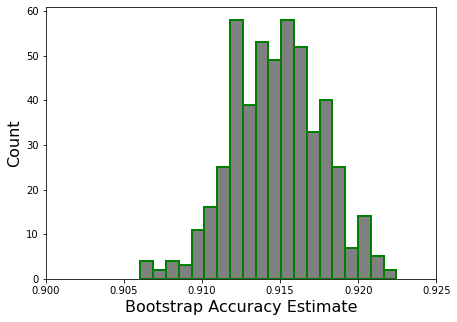

In [ ]:
fig, axs = plt.subplots(ncols=1, figsize=(7,5))
axs.set_xlabel('Bootstrap Accuracy Estimate', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs.set_xlim([0.9,0.925])

(0.1, 0.2)

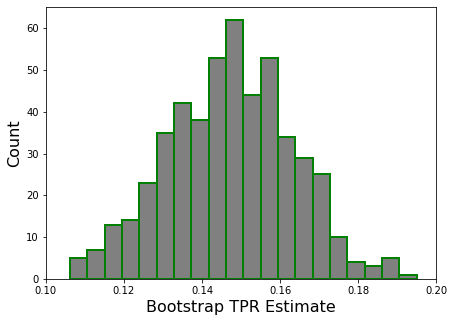

In [ ]:
fig, axs = plt.subplots(ncols=1, figsize=(7,5))
axs.set_xlabel('Bootstrap TPR Estimate', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output.iloc[:,1], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs.set_xlim([0.1,0.2])

####Optimal Decision Tree Classifier for TPR

####Decision Tree Classifier with Cross Validation for TPR

In [ ]:
#Note that we accidentally tried to run this cell again after it had already finished the first time. Thus, it is showing a keyboard interupt, but the output of the CV is still below and nothing has changed to make that output any different.
grid_values_dtc_o = {'ccp_alpha': np.linspace(0, 0.001, 25),
               'random_state': [88]}


dtc_o = DecisionTreeClassifier()
dtc_cv_o = GridSearchCV(dtc_o, param_grid = grid_values_dtc_o, scoring = 'recall', cv=2, verbose=1) # default scoring metric to optimize is accuracy, used as default if none given.
dtc_cv_o.fit(X_train, y_train)

Fitting 2 folds for each of 25 candidates, totalling 50 fits


KeyboardInterrupt: ignored

In [ ]:
tpr_o = dtc_cv_o.cv_results_['mean_test_score'] # what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp_o = dtc_cv_o.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp_o, 'Validation TPR': tpr_o}).head(20)

,ccp alpha,Validation TPR
0,0.0,0.177278
1,0.000042,0.177278
2,0.000083,0.173359
3,0.000125,0.149862
4,0.000167,0.122432
5,0.000208,0.094027
6,0.00025,0.072463
7,0.000292,0.065606
8,0.000333,0.056786
9,0.000375,0.040146


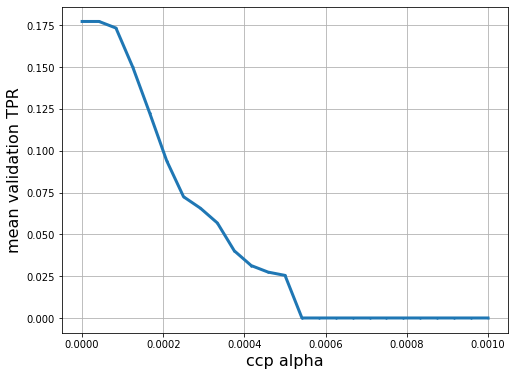

In [ ]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation TPR', fontsize=16)
plt.scatter(ccp_o, tpr_o, s=2)
plt.plot(ccp_o, tpr_o, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [ ]:
print('Grid best parameter ccp_alpha (max. TPR): ', dtc_cv_o.best_params_['ccp_alpha'])
print('Grid best score (TPR): ', dtc_cv_o.best_score_)

Grid best parameter ccp_alpha (max. TPR):  0.0
Grid best score (TPR):  0.17727830858370747


Node count = 2483


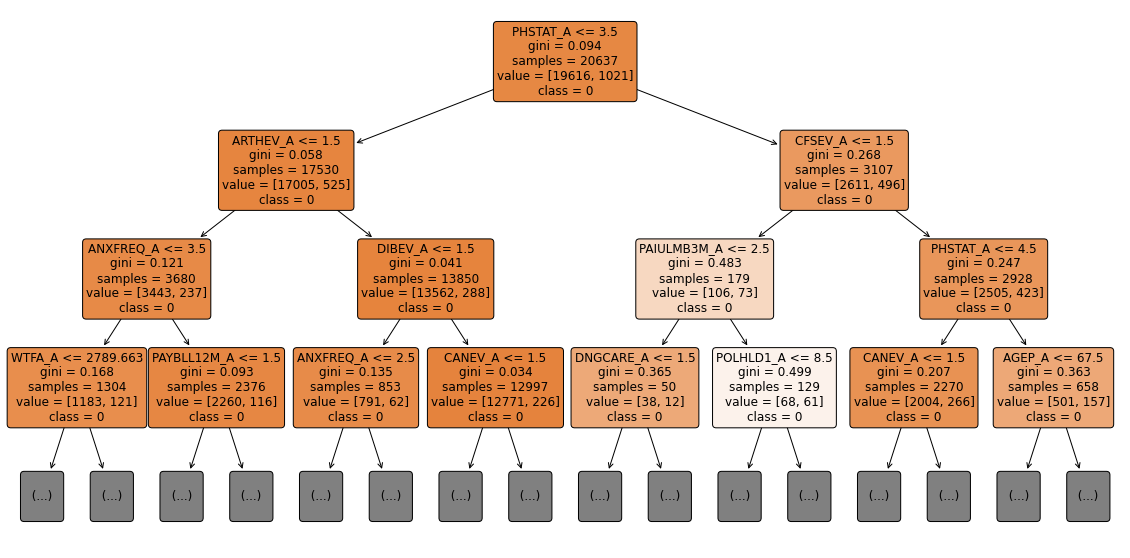

In [ ]:
print('Node count =', dtc_cv_o.best_estimator_.tree_.node_count)

plt.figure(figsize=(20,10))
plot_tree(dtc_cv_o.best_estimator_,
          feature_names=X_train.columns,
          class_names=['0','1'],
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12,
          max_depth=3)
plt.show()

In [ ]:
y_pred_dtc_cv_o = dtc_cv_o.best_estimator_.predict(X_test)

acc_dtc_o = accuracy_score(y_test, y_pred_dtc_cv_o)
recall_dtc_o = recall_score(y_test, y_pred_dtc_cv_o)
pre_dtc_o = pre(y_test, y_pred_dtc_cv_o)
fpr_dtc_o = fpr(y_test, y_pred_dtc_cv_o)
print(f'DTC Optimized Test Accuracy: {acc_dtc_o:.4f}')
print(f'DTC Optimized Test TPR: {recall_dtc_o:.4f}')

DTC Optimized Test Accuracy: 0.9149
DTC Optimized Test TPR: 0.1807


####Decision Tree Classifier for TPR

In [ ]:
dtc_tpr = DecisionTreeClassifier(random_state = 88)
dtc_tpr.fit(X_train, y_train)
y_pred_dtc_tpr = dtc_tpr.predict(X_test)

In [ ]:
array = dtc_tpr.cost_complexity_pruning_path(X_train, y_train)
ccp_a = array['ccp_alphas']
ccp_a

array([0.00000000e+00, 2.42086938e-05, 3.18222812e-05, 3.18293718e-05,
       3.19243848e-05, 3.19331216e-05, 3.19781296e-05, 3.20160045e-05,
       3.20259505e-05, 3.20633591e-05, 3.20761371e-05, 3.20919078e-05,
       3.21187793e-05, 3.21335141e-05, 3.21370565e-05, 3.21476194e-05,
       3.21767515e-05, 3.21803489e-05, 3.22198704e-05, 3.22236759e-05,
       3.22240777e-05, 3.22250649e-05, 3.22351816e-05, 3.22598176e-05,
       3.24305890e-05, 3.83092618e-05, 3.84705311e-05, 3.85359438e-05,
       3.86204073e-05, 4.03805463e-05, 4.08056046e-05, 4.15342762e-05,
       4.23995736e-05, 4.24199678e-05, 4.24211239e-05, 4.28217962e-05,
       4.30725827e-05, 4.30725827e-05, 4.33716978e-05, 4.36109900e-05,
       4.40407342e-05, 4.40515050e-05, 4.43297303e-05, 4.44186009e-05,
       4.44186009e-05, 4.45277375e-05, 4.45277375e-05, 4.47292205e-05,
       4.48404872e-05, 4.49954658e-05, 4.49954658e-05, 4.49954658e-05,
       4.52262118e-05, 4.52262118e-05, 4.52262118e-05, 4.54281146e-05,
      

In [ ]:
tpr_train = []
tpr_test = []
for i in ccp_a:
  dtc_new = DecisionTreeClassifier(ccp_alpha = i)
  dtc_new.fit(X_train, y_train)
  y_train_pred = dtc_new.predict(X_train)
  y_test_pred = dtc_new.predict(X_test)
  tpr_train.append(tpr(y_train, y_train_pred))
  tpr_test.append(tpr(y_test, y_test_pred))

KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation TPR', fontsize=16)
plt.scatter(ccp_a, tpr_train, s=2)
plt.plot(ccp_a, tpr_train, linewidth=3)
plt.grid(True, which='both')
plt.show()

####Logistic Regression for TPR

In [ ]:
logreg_tpr = sm.Logit(y_train,X_train).fit()
y_pred_logreg_tpr = logreg_tpr.predict(X_train)
array2 = [x*.05 for x in np.arange(1,11)]
acc_v, rec_v = [], []
for i in array2:
  y_pred_logreg_tpr_2 = pd.Series([1 if x > i else 0 for x in y_pred_logreg_tpr], index = y_pred_logreg_tpr.index)
  acc_logreg_tpr = accuracy_score(y_train, y_pred_logreg_tpr_2)
  recall_logreg_tpr = tpr(y_train, y_pred_logreg_tpr_2)
  acc_v.append(acc_logreg_tpr)
  rec_v.append(recall_logreg_tpr)

Optimization terminated successfully.
         Current function value: 0.149912
         Iterations 9


In [ ]:
pd.DataFrame({'Threshold Values' : array2, 'Accuracy' : acc_v, 'TPR': rec_v}).head(20)

,Threshold Values,Accuracy,TPR
0,0.05,0.775746,0.673759
1,0.10,0.894129,0.524823
2,0.15,0.924286,0.368794
3,0.20,0.941611,0.276596
4,0.25,0.949310,0.226950
5,0.30,0.953802,0.163121
6,0.35,0.956368,0.148936
7,0.40,0.956047,0.113475
8,0.45,0.956047,0.070922
9,0.50,0.955406,0.035461


In [ ]:
logreg_tpr2 = sm.Logit(y_train,X_train).fit()
y_pred_logreg_tpr2 = logreg_tpr2.predict(X_test)
y_pred_logreg_tpr2 = pd.Series([1 if x > 0.2 else 0 for x in y_pred_logreg_tpr2], index = y_pred_logreg_tpr2.index)

Optimization terminated successfully.
         Current function value: 0.149912
         Iterations 9


In [ ]:
recall_logreg_2_tpr = tpr(y_test, y_pred_logreg_tpr2)
acc_logreg_2_tpr = accuracy_score(y_test, y_pred_logreg_tpr2)

print(f'Logistic Regression Test Accuracy: {acc_logreg_2_tpr:.4f}')
print(f'Logistic Regression TPR Accuracy: {recall_logreg_2_tpr:.4f}')

Logistic Regression Test Accuracy: 0.9334
Logistic Regression TPR Accuracy: 0.1786


#### Trying to Improve LogReg Through Feature Selection

In [ ]:
high_pvals = logreg_tpr2.pvalues[logreg_tpr2.pvalues > 0.05]
high_pval_vars = high_pvals.index.tolist()

In [ ]:
X_train_feature_selection = X_train.drop(high_pval_vars, axis=1)
X_test_feature_selection = X_test.drop(high_pval_vars, axis=1)
X_train_feature_selection.head()

,SINCOVRX_A,CFSEV_A,ARTHEV_A,PAYBLL12M_A,AGEP_A,CANEV_A,PHSTAT_A,COLOGUARD1_A,CVDRSLT_A
3671,2.0,2.0,2.0,2.0,28.0,2.0,1.0,9.0,2.0
4313,2.0,2.0,1.0,2.0,78.0,2.0,2.0,2.0,9.0
717,2.0,2.0,2.0,2.0,79.0,2.0,2.0,2.0,9.0
416,2.0,2.0,2.0,2.0,51.0,2.0,2.0,2.0,9.0
267,2.0,2.0,2.0,2.0,47.0,2.0,1.0,2.0,9.0


In [ ]:
logreg_feature_selection = sm.Logit(y_train,X_train_feature_selection).fit()

Optimization terminated successfully.
         Current function value: 0.159100
         Iterations 8


In [ ]:
y_pred_logreg_feature_selection = logreg_feature_selection.predict(X_test_feature_selection)
y_pred_logreg_feature_selection_1 = pd.Series([1 if x > 0.2 else 0 for x in y_pred_logreg_feature_selection], index = y_pred_logreg_feature_selection.index)

In [ ]:
acc_logreg_feature_selection = accuracy_score(y_test, y_pred_logreg_feature_selection_1)
recall_logreg_feature_selection = tpr(y_test, y_pred_logreg_feature_selection_1)
pre_logreg_feature_selection = pre(y_test, y_pred_logreg_feature_selection_1)
fpr_logreg_feature_selection = fpr(y_test, y_pred_logreg_feature_selection_1)

# CONCLUSION: Accuracy is a little higher this time, so feature selection worked.
print(f'Logistic Regression Feature Selection Test Accuracy: {acc_logreg_feature_selection:.4f}')
print(f'Logistic Regression Feature Selection TPR Accuracy: {recall_logreg_feature_selection:.4f}')

Logistic Regression Feature Selection Test Accuracy: 0.9476
Logistic Regression Feature Selection TPR Accuracy: 0.1071


#### Bootstrap Validation for Logistic Regression

In [ ]:
def bootstrap_validation_logreg(test_data, test_label, model, metrics_list, sample=500, random_state=66):
    tic = time.time()
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        bs_predicted = pd.Series([1 if x > 0.2 else 0 for x in bs_predicted], index = bs_predicted.index)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted,bs_label)
    output_df = pd.DataFrame(output_array)
    return output_df

In [ ]:
bs_output_2 = bootstrap_validation_logreg(X_test,y_test,logreg_tpr2,
                                 metrics_list=[acc, tpr, fpr, pre],
                                 sample = 500)

(500, 4)


In [ ]:
bs_output_2.head()

,0,1,2,3
0,0.925898,0.237288,0.042287,0.205882
1,0.939371,0.190476,0.036321,0.145455
2,0.939371,0.104167,0.029503,0.116279
3,0.935629,0.209302,0.040217,0.147541
4,0.931886,0.258621,0.037559,0.238095


(0.005, 0.4)

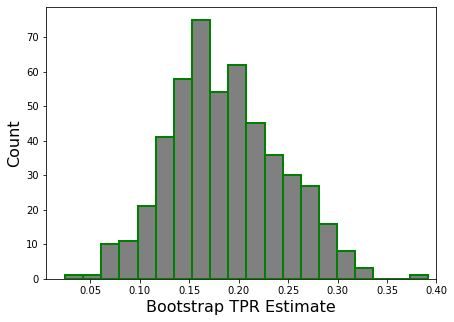

In [ ]:
fig, axs = plt.subplots(ncols=1, figsize=(7,5))
axs.set_xlabel('Bootstrap TPR Estimate', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output_2.iloc[:,1], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs.set_xlim([0.005,0.4])

(0.91, 0.955)

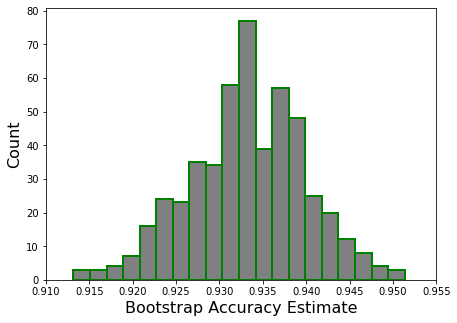

In [ ]:
fig, axs = plt.subplots(ncols=1, figsize=(7,5))
axs.set_xlabel('Bootstrap Accuracy Estimate', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output_2.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs.set_xlim([0.91,0.955])